# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [22]:
# There is column or row with NaN values
sensor.isnull().values.any()

False

How many rows and columns are in our data?

In [9]:
# There are 1751 rows and 12 columns in the dataframe
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [79]:
d_range = pd.date_range("1/1/2018", periods = 1751, freq = "S")
d_range

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [80]:
pd.infer_freq(d_range)
print(d_range)
freq = d_range

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')


Assign the time series index to the dataframe's index.

In [43]:
sensor['time'] = d_range

In [48]:
sensor = sensor.set_index("time")

In [49]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
time,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

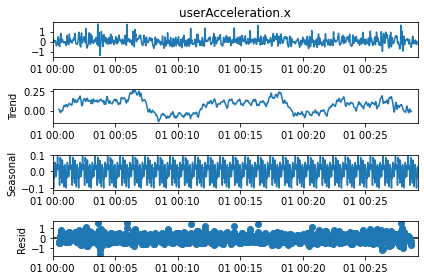

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
aceleration_x = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period = 60)
aceleration_x.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<Figure size 720x360 with 0 Axes>

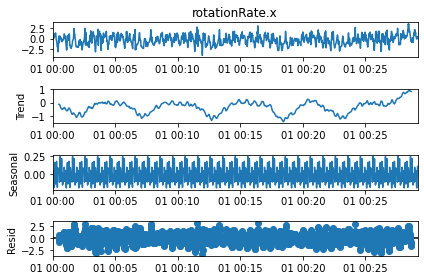

In [66]:
rotation_x = seasonal_decompose(sensor['rotationRate.x'], model="additive", period = 60)
rotation_x.plot();

Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

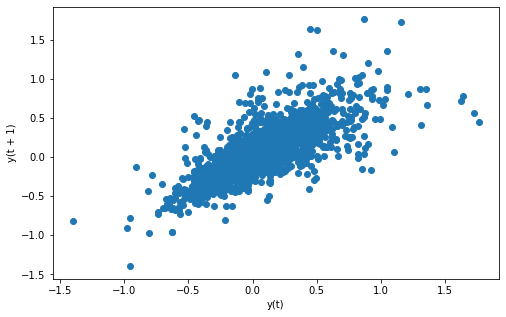

In [83]:
plt.figure(figsize=(8,5))
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);

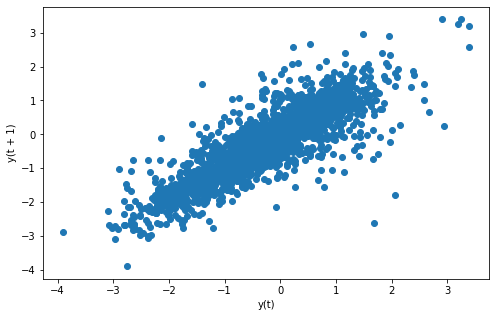

In [75]:
plt.figure(figsize=(8,5))
pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);

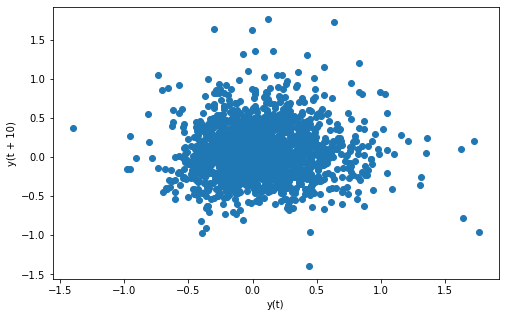

In [84]:
plt.figure(figsize=(8,5))
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=10);

Create a lag plot for `rotationRate.x`

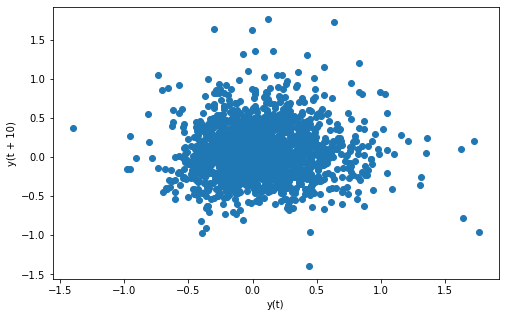

In [85]:
plt.figure(figsize=(8,5))
pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=10);

What are your conclusions from both visualizations?

Both graphs have a linear pattern. in both cases the correlation between the values is positive, and in the case of rotationRate.x the data is more spread.   

Increasing the lag from both plots it is possible to see a certain amount of randomness. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [115]:
test = adfuller(sensor['rotationRate.x'])
test

(-5.269860625086401,
 6.3202303359128005e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [116]:
# These are the names to call all the values above, in the same order. 
adf, pvalue, usedlag, nobs, critical_values, icbest = test

In [117]:
critical_values

{'1%': -3.4341465551936534,
 '5%': -2.863216966926812,
 '10%': -2.567662770090317}

In [118]:
adf

-5.269860625086401

In [124]:
pvalue

2.823439483037483e-30

In [128]:
print(f"The critical values are {critical_values}\nThe adf is {adf}")

The critical values are {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}
The adf is -17.957994086169755


In [120]:
test_2 = adfuller(sensor['userAcceleration.x'])
test_2

(-17.957994086169755,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [121]:
adf, pvalue, usedlag, nobs, critical_values, icbest = test_2

In [122]:
adf

-17.957994086169755

In [127]:
print(f"The critical values are {critical_values}\nThe adf is {adf}")

The critical values are {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}
The adf is -17.957994086169755


What are your conclusions from this test?

Since the adf-s are smaller than any of the critical values, we reject the null hypothesis ($H_0$). 

We can affirm that the data is stationary on a 99% confidence level.

Also, as the pvalue in both cases is lower than 0.05, which confirms that the statement can be taken into account. 